# project on fake news detection using natural language processing 
<!-- dataset is available on kaggle 
the below dataset is divided into 2 sets train_set and test_test 
train_set is used for training of data 
test_set is used for testing of data  -->

In [3]:
# Loading essential libraries

import numpy as np 
import pandas as pd 

In [4]:
# Loading the dataset
dataframe  = pd.read_csv('data/train.csv')

# Exploring the data set 

In [5]:
dataframe.shape

(20800, 5)

In [8]:
dataframe.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [9]:
dataframe.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [14]:
dataframe.head().T

,0,1,2,3,4
id,0,1,2,3,4
title,House Dem Aide: We Didn’t Even See Comey’s Let...,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Why the Truth Might Get You Fired,15 Civilians Killed In Single US Airstrike Hav...,Iranian woman jailed for fictional unpublished...
author,Darrell Lucus,Daniel J. Flynn,Consortiumnews.com,Jessica Purkiss,Howard Portnoy
text,House Dem Aide: We Didn’t Even See Comey’s Let...,Ever get the feeling your life circles the rou...,"Why the Truth Might Get You Fired October 29, ...",Videos 15 Civilians Killed In Single US Airstr...,Print \nAn Iranian woman has been sentenced to...
label,1,0,1,1,1


In [16]:
# Dropping the 'id' column

dataframe.drop('id', axis=1, inplace=True)

In [17]:
# Importing essential libraries for visualization

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

Text(0, 0.5, 'Count')

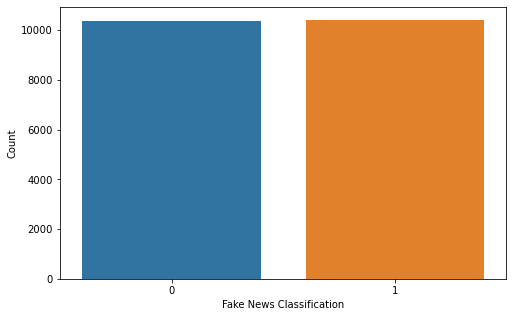

In [18]:
# Visualizing the count of 'fake news' in the dataset

plt.figure(figsize=(8,5))
sns.countplot(x='label', data=dataframe)
plt.xlabel('Fake News Classification')
plt.ylabel('Count')

# Data Cleaning and Preprocessing

In [19]:
print(dataframe.shape)

(20800, 4)


# Finding any NaN values

In [20]:
dataframe.isna().any()

title      True
author     True
text       True
label     False
dtype: bool

In [21]:
dataframe.isna().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
so there are this number of missing values 

In [24]:
# Dropping missing  values

dataframe.dropna(inplace=True)
print(dataframe.shape)

(18285, 4)


In [ ]:
we have removed missing values 

In [25]:
news = dataframe.copy()

In [26]:
news.reset_index(inplace=True)

In [27]:
# Importing essential libraries for performing Natural Language Processing on 'train' dataset

import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chaitanya_kr_01/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
# Cleaning the news
corpus = []
ps = PorterStemmer()

for i in range(0,news.shape[0]):

  # Cleaning special character from the news-title
  title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=news.title[i])

  # Converting the entire news-title to lower case
  title = title.lower()

  # Tokenizing the news-title by words
  words = title.split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  title = ' '.join(words)

  # Building a corpus of news-title
  corpus.append(title)


In [29]:
corpus[0:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [30]:
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()



In [31]:
X.shape

(18285, 5000)

In [32]:
X[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
# Extracting dependent variable from the dataset

y = news['label']

# Model Building

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
#Multinomial Naive Bayes

In [35]:
# Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [36]:
# Predicting the Test set results

nb_y_pred = nb_classifier.predict(X_test)

In [37]:
# Accuracy, Precision and Recall

from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 90.16%
Precision score is: 0.87
Recall score is: 0.91


In [38]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [39]:
nb_cm

array([[1823,  217],
       [ 143, 1474]])

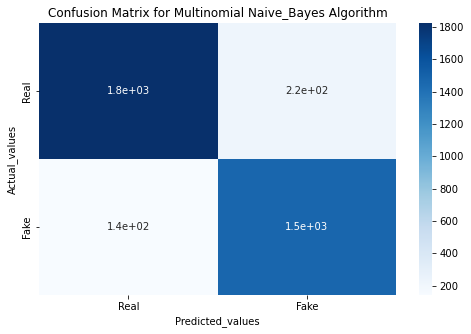

In [45]:
# Plotting the confusion matrix

plt.figure(figsize=(8,5))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted_values')
plt.ylabel('Actual_values')
plt.title('Confusion Matrix for Multinomial Naive_Bayes Algorithm')
plt.show()

In [46]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 90.51%
Accuracy score for alpha=0.2 is: 90.51%
Accuracy score for alpha=0.3 is: 90.59%
Accuracy score for alpha=0.4 is: 90.51%
Accuracy score for alpha=0.5 is: 90.43%
Accuracy score for alpha=0.6 is: 90.37%
Accuracy score for alpha=0.7 is: 90.27%
Accuracy score for alpha=0.8 is: 90.21%
Accuracy score for alpha=0.9 is: 90.16%
Accuracy score for alpha=1.0 is: 90.16%
--------------------------------------------
The best accuracy is 90.59% with alpha value as 0.3


In [ ]:
#Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [48]:
# Predicting the Test set results

lr_y_pred = lr_classifier.predict(X_test)

In [49]:
# Accuracy, Precision and Recall

from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 93.52%
Precision score is: 0.89
Recall score is: 0.97


In [50]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

In [51]:
lr_cm

array([[1850,  190],
       [  47, 1570]])

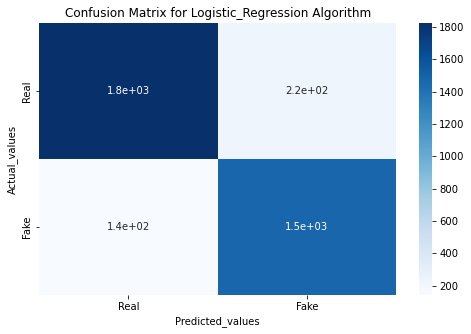

In [53]:
# Plotting the confusion matrix

plt.figure(figsize=(8,5))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted_values')
plt.ylabel('Actual_values')
plt.title('Confusion Matrix for Logistic_Regression Algorithm')
plt.show()

In [54]:
# Hyperparameter tuning the Logistic Regression Classifier

best_accuracy = 0.0
c_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = LogisticRegression(C=i, random_state=0)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for C={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    c_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with C value as {}'.format(round(best_accuracy*100, 2), round(c_val,1)))


Accuracy score for C=0.1 is: 92.02%
Accuracy score for C=0.2 is: 92.86%
Accuracy score for C=0.3 is: 93.22%
Accuracy score for C=0.4 is: 93.38%
Accuracy score for C=0.5 is: 93.49%
Accuracy score for C=0.6 is: 93.49%
Accuracy score for C=0.7 is: 93.55%
Accuracy score for C=0.8 is: 93.63%
Accuracy score for C=0.9 is: 93.57%
Accuracy score for C=1.0 is: 93.52%
--------------------------------------------
The best accuracy is 93.63% with C value as 0.8


In [55]:
classifier = LogisticRegression(C=0.8, random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=0.8, random_state=0)

In [ ]:
#Predictions

In [56]:
def fake_news(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return classifier.predict(temp)

In [59]:
# Importing test dataset

df_test = pd.read_csv('data/test.csv')


In [60]:
df_test.columns

Index(['id', 'title', 'author', 'text'], dtype='object')

In [61]:
news_title = df_test['title']

In [62]:
news_title.shape

(5200,)

In [63]:
# For generating random integer

from random import randint

In [64]:
# Predicting values

row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: KASSAM: Wanna Know Why the UK Can’t Defeat Terrorism? Watch How Media Attacked A Politician for Demanding Strength
Prediction: This is a REAL news.


In [65]:
# Predicting values

row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: From Valdai with a message of confidence and reform
Prediction: This is a FAKE news!


In [66]:
# Predicting values

row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Challenge for Super Bowl Commercials: Not Taking Sides, Politically - The New York Times
Prediction: This is a REAL news.


In [67]:
# Predicting values

row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Watch: Stephen Colbert Mocks Rachel Maddow For Lengthy Trump Tax Tease - Breitbart
Prediction: This is a REAL news.
